Walmart data set manipulation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pickle

from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer
from scipy.spatial.distance import cdist
from math import floor

import os 

from google.colab import drive
drive.mount('/content/gdrive')

np.random.seed(9001)
#WHAT!? 9000!?!?

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Load Dataset

In [ ]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Data/W_train.csv')

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.shape

(421570, 7)

In [ ]:
df.head()

,Unnamed: 0,index,Store,Dept,Date,Weekly_Sales,IsHoliday
0,0,0,1,1,2010-02-05,24924.50,0
1,1,1,1,1,2010-02-12,46039.49,1
2,2,2,1,1,2010-02-19,41595.55,0
3,3,3,1,1,2010-02-26,19403.54,0
4,4,4,1,1,2010-03-05,21827.90,0


In [ ]:
df['Dept'].describe()

count    421570.000000
mean         44.260317
std          30.492054
min           1.000000
25%          18.000000
50%          37.000000
75%          74.000000
max          99.000000
Name: Dept, dtype: float64

In [ ]:
df['Store'].describe()

count    421570.000000
mean         22.200546
std          12.785297
min           1.000000
25%          11.000000
50%          22.000000
75%          33.000000
max          45.000000
Name: Store, dtype: float64

In [ ]:
print(df['Weekly_Sales'].describe())

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


# Dataset Manipulation

##Replace Observations With Negative Weekly Sales With The Mean



In [ ]:
print(df.shape)
'''Gather negative observations'''
neg=df.loc[df['Weekly_Sales']<0]
i=0

while(i<len(neg)):
    row=neg.iloc[i]
    #key 0 retrieves index value
    ind=row.get(key=0)
    df.at[ind,'Weekly_Sales']=df['Weekly_Sales'].mean()
    i+=1
print(df.iloc[846]) 
#1285 observations altered

(421570, 7)
Unnamed: 0                      846
index                           846
Store                             1
Dept                              6
Date            2012-08-10 00:00:00
Weekly_Sales                15981.3
IsHoliday                         0
Name: 846, dtype: object


In [ ]:
neg=df.loc[df['Weekly_Sales']==0]
neg.describe()

,Unnamed: 0,index,Store,Dept,Weekly_Sales,IsHoliday
count,73.000000,73.000000,73.000000,73.000000,73.0,73.000000
mean,204141.287671,204141.287671,21.424658,52.657534,0.0,0.041096
std,119955.909859,119955.909859,12.719100,17.147416,0.0,0.199886
min,6055.000000,6055.000000,1.000000,18.000000,0.0,0.000000
25%,114125.000000,114125.000000,12.000000,47.000000,0.0,0.000000
50%,183622.000000,183622.000000,19.000000,49.000000,0.0,0.000000
75%,296103.000000,296103.000000,31.000000,54.000000,0.0,0.000000
max,418150.000000,418150.000000,45.000000,98.000000,0.0,1.000000


In [ ]:
print(df['Weekly_Sales'].describe())

count    421570.000000
mean      16030.254816
std       22693.833976
min           0.000000
25%        2130.877500
50%        7709.810000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64


##Winsorizing Weekly Sales

In [ ]:
class Winsorizer():
  def __init__(self, df):
    self.upper = df.quantile(0.95)
    self.lower = df.quantile(0.05)
    self.df = df
  def _transformer_up(self, x):
    if x > self.upper:
      return self.upper
    else:
      return x
  def _transformer_down(self, x):
    if x < self.lower:
      return self.lower
    else:
      return x
  def transform(self):
    self.df = self.df.apply(self._transformer_up)
    self.df = self.df.apply(self._transformer_down)
    return self.df


In [ ]:
print(df.shape)
wind=Winsorizer(df['Weekly_Sales'])
df['Weekly_Sales']=wind.transform()
print(df.shape)

(421570, 7)
(421570, 7)


##Code To Trim The Top And Bottom 5% Of Data:

---





In [ ]:
'''print(df.shape)
df["Weekly_Sales"] = pd.to_numeric(df["Weekly_Sales"])

ws=df['Weekly_Sales']
sort=sorted(ws)
t5=floor(len(ws)*.95)
b5=floor(len(ws)*.05)
top=sort[t5:]
bottom=sort[:b5+1]
fat=[]
for i in bottom:
    fat.append(i)
for i in top:
    fat.append(i)
for i in fat:
    ind=df[df['Weekly_Sales'] == i].index.values
    df=df.drop(ind)
print(df.shape)'''

'print(df.shape)\ndf["Weekly_Sales"] = pd.to_numeric(df["Weekly_Sales"])\n\nws=df[\'Weekly_Sales\']\nsort=sorted(ws)\nt5=floor(len(ws)*.95)\nb5=floor(len(ws)*.05)\ntop=sort[t5:]\nbottom=sort[:b5+1]\nfat=[]\nfor i in bottom:\n    fat.append(i)\nfor i in top:\n    fat.append(i)\nfor i in fat:\n    ind=df[df[\'Weekly_Sales\'] == i].index.values\n    df=df.drop(ind)\nprint(df.shape)'

##Plots

(array([188844.,  72272.,  45203.,  28473.,  18833.,  14652.,  11167.,
          8714.,   6764.,  26648.]),
 array([   67.5   ,  6180.9451, 12294.3902, 18407.8353, 24521.2804,
        30634.7255, 36748.1706, 42861.6157, 48975.0608, 55088.5059,
        61201.951 ]),
 <a list of 10 Patch objects>)

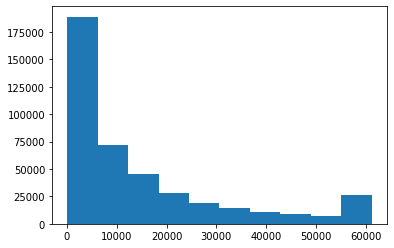

In [ ]:
plt.hist(df['Weekly_Sales'])

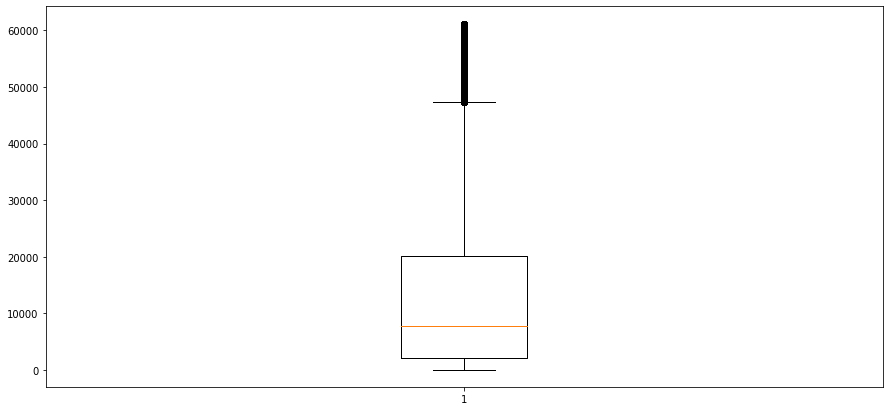

In [ ]:
plt.figure(figsize =(15, 7))
plt.boxplot(df['Weekly_Sales'])
plt.show()

Scale Weekly in accodance to Log(1+p)

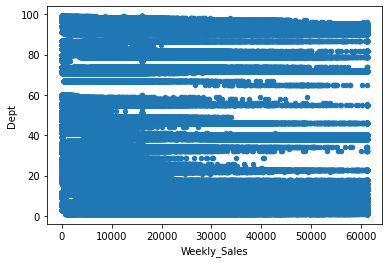

In [ ]:
df.plot.scatter(x= 'Weekly_Sales', y= 'Dept')

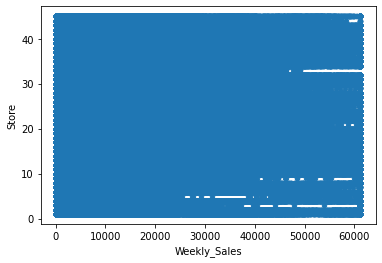

In [ ]:
df.plot.scatter(x= 'Weekly_Sales', y= 'Store')

##Pre split data manipulaton

In [ ]:
#prevelance of 0s create -inf results
df['Weekly_Sales_log']=df['Weekly_Sales'].apply(lambda x:np.log(1+x))

In [ ]:
df['Weekly_Sales_log'].describe()

count    421570.000000
mean          8.578983
std           1.814827
min           4.226834
25%           7.664758
50%           8.950379
75%           9.913777
max          11.021951
Name: Weekly_Sales_log, dtype: float64

(array([29319.,  9946., 14073., 19925., 29924., 47203., 63917., 73370.,
        66957., 66936.]),
 array([ 4.22683375,  4.90634544,  5.58585713,  6.26536883,  6.94488052,
         7.62439222,  8.30390391,  8.9834156 ,  9.6629273 , 10.34243899,
        11.02195069]),
 <a list of 10 Patch objects>)

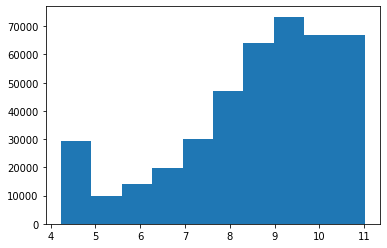

In [ ]:
plt.hist(df['Weekly_Sales_log'])

Utilize Yeo Johnson Power transformation take left skewed data and normalize it:

In [ ]:
pt = PowerTransformer()
ws=df['Weekly_Sales'].to_numpy()
pt.fit(ws.reshape(-1,1))
yj=pt.transform(ws.reshape(-1,1))
df['Weekly_YJLogs']=yj

(array([39121., 23704., 32102., 45120., 54860., 57229., 54004., 41611.,
        30988., 42831.]),
 array([-1.876498  , -1.51501676, -1.15353551, -0.79205427, -0.43057303,
        -0.06909179,  0.29238945,  0.65387069,  1.01535193,  1.37683318,
         1.73831442]),
 <a list of 10 Patch objects>)

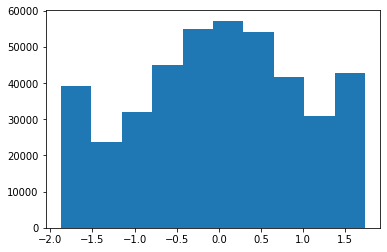

In [ ]:
plt.hist(df['Weekly_YJLogs'])

In [ ]:
df.Weekly_Sales.describe().loc["mean",]

14607.618948773026

In [ ]:
def minMax(col):
  min = df[col].min()
  max = df[col].max()
  return (df[col] - min) / (max - min)

In [ ]:
df["minMax_WeeklySales"] = minMax("Weekly_Sales")

In [ ]:
df['minMax_WeeklySales'].describe()

count    421570.000000
mean          0.237838
std           0.280189
min           0.000000
25%           0.033751
50%           0.125008
75%           0.329411
max           1.000000
Name: minMax_WeeklySales, dtype: float64

(array([188844.,  72272.,  45203.,  28473.,  18833.,  14652.,  11167.,
          8714.,   6764.,  26648.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

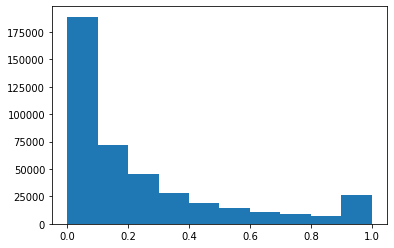

In [ ]:
plt.hist(df['minMax_WeeklySales'])

In [ ]:
df.describe()

,Unnamed: 0,index,Store,Dept,Weekly_Sales,IsHoliday,Weekly_Sales_log,Weekly_YJLogs,minMax_WeeklySales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,4.215700e+05,421570.000000
mean,210784.500000,210784.500000,22.200546,44.260317,14607.618949,0.070358,8.578983,-1.069627e-14,0.237838
std,121696.920828,121696.920828,12.785297,30.492054,17129.216850,0.255750,1.814827,1.000001e+00,0.280189
min,0.000000,0.000000,1.000000,1.000000,67.500000,0.000000,4.226834,-1.876498e+00,0.000000
25%,105392.250000,105392.250000,11.000000,18.000000,2130.877500,0.000000,7.664758,-6.961848e-01,0.033751
50%,210784.500000,210784.500000,22.000000,37.000000,7709.810000,0.000000,8.950379,3.158053e-02,0.125008
75%,316176.750000,316176.750000,33.000000,74.000000,20205.852500,0.000000,9.913777,7.293067e-01,0.329411
max,421569.000000,421569.000000,45.000000,99.000000,61201.951000,1.000000,11.021951,1.738314e+00,1.000000


In [ ]:
df['Date']

0        2010-02-05
1        2010-02-12
2        2010-02-19
3        2010-02-26
4        2010-03-05
            ...    
421565   2012-09-28
421566   2012-10-05
421567   2012-10-12
421568   2012-10-19
421569   2012-10-26
Name: Date, Length: 421570, dtype: datetime64[ns]

# Begin creation of Corporate CSV

In [ ]:
dfCorp=df.drop(columns=['Unnamed: 0','index','Weekly_YJLogs','Weekly_Sales_log','minMax_WeeklySales','Store','Dept','IsHoliday'])
dfCorp.describe()

,Weekly_Sales
count,421570.000000
mean,14607.618949
std,17129.216850
min,67.500000
25%,2130.877500
50%,7709.810000
75%,20205.852500
max,61201.951000


In [ ]:
dates=set(df['Date'])
dates=sorted(dates)
print(dates[0],dates[-1])
#142 weeks between the two dates with 143 unique values

2010-02-05 00:00:00 2012-10-26 00:00:00


In [ ]:
d = {'Date':dates, 'Weekly_Sales':np.empty([len(dates)])}
dfCorp = pd.DataFrame(data=d)

Aggregate all sales of all dates 

In [ ]:
sales=[]
for date in dates:
  '''Gather the weekly reportings of a given a week'''
  week=df.loc[df['Date']==date]
  i=0
  sale=0
  while(i<len(week)):
    row=week.iloc[i]
    #key 5 retrieves Weekly Sales value
    sale+=row.get(key=5)
    i+=1
  sales.append(sale)

Populate Corporate dataframe:

In [ ]:
i=0
for sale in sales:
  dfCorp.at[i,'Weekly_Sales']=sale
  i+=1

In [ ]:
dfCorp.describe()

,Weekly_Sales
count,1.430000e+02
mean,4.306387e+07
std,3.532692e+06
min,3.684533e+07
25%,4.155836e+07
50%,4.255290e+07
75%,4.395299e+07
max,6.329779e+07


(array([11., 47., 66., 10.,  3.,  2.,  2.,  0.,  0.,  2.]),
 array([36845327.06604905, 39490573.33323463, 42135819.60042021,
        44781065.86760579, 47426312.13479137, 50071558.40197694,
        52716804.66916253, 55362050.9363481 , 58007297.20353368,
        60652543.47071926, 63297789.73790484]),
 <a list of 10 Patch objects>)

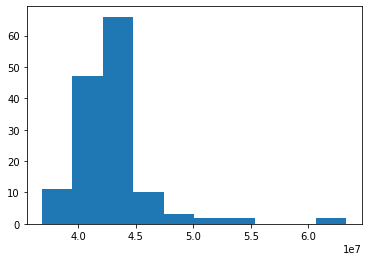

In [ ]:
plt.hist(dfCorp['Weekly_Sales'])

In [ ]:
dfCorp.loc[dfCorp['Weekly_Sales']==63297789.73790484]

,Date,Weekly_Sales
46,2010-12-24,6.329779e+07


##Aggregate Data Manipulation

##Log Manipulation:

In [ ]:
dfCorp['Weekly_Sales_log']=dfCorp['Weekly_Sales'].apply(lambda x:np.log(x))

(array([ 8., 24., 58., 41.,  4.,  2.,  4.,  0.,  0.,  2.]),
 array([17.42223936, 17.47635152, 17.53046368, 17.58457584, 17.638688  ,
        17.69280016, 17.74691233, 17.80102449, 17.85513665, 17.90924881,
        17.96336097]),
 <a list of 10 Patch objects>)

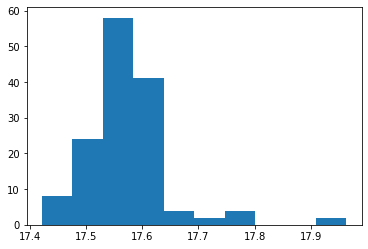

In [ ]:
plt.hist(dfCorp['Weekly_Sales_log'])

In [ ]:
def minMax(col):
  min = dfCorp[col].min()
  max = dfCorp[col].max()
  return (dfCorp[col] - min) / (max - min)

In [ ]:
dfCorp["log_minMax"] = minMax("Weekly_Sales_log")

17.42223935895342 17.963360969252093


(array([ 8., 24., 58., 41.,  4.,  2.,  4.,  0.,  0.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

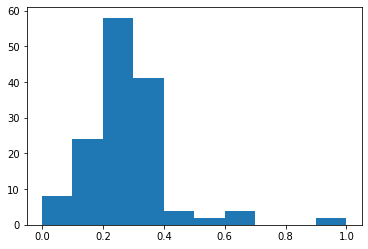

In [ ]:
plt.hist(dfCorp['log_minMax'])

##Min Max Manipulation

In [ ]:
dfCorp["minMax_WeeklySales"] = minMax("Weekly_Sales")

(array([11., 47., 66., 10.,  3.,  2.,  2.,  0.,  0.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

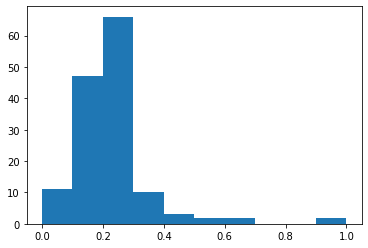

In [ ]:
plt.hist(dfCorp['minMax_WeeklySales'])

In [ ]:
dfCorp['minMax_log']=dfCorp['minMax_WeeklySales'].apply(lambda x:np.log(1+x))

(array([ 7., 18., 55., 49.,  5.,  3.,  4.,  0.,  0.,  2.]),
 array([0.        , 0.06931472, 0.13862944, 0.20794415, 0.27725887,
        0.34657359, 0.41588831, 0.48520303, 0.55451774, 0.62383246,
        0.69314718]),
 <a list of 10 Patch objects>)

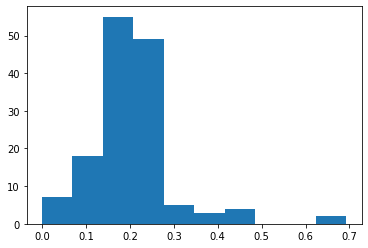

In [ ]:
plt.hist(dfCorp['minMax_log'])

In [ ]:
dfCorp.describe()

,Weekly_Sales,Weekly_Sales_log,log_minMax,minMax_WeeklySales,minMax_log
count,1.430000e+02,143.000000,143.000000,143.000000,143.000000
mean,4.306387e+07,17.575234,0.282736,0.235084,0.206136
std,3.532692e+06,0.075126,0.138834,0.133549,0.097126
min,3.684533e+07,17.422239,0.000000,0.000000,0.000000
25%,4.155836e+07,17.542609,0.222445,0.178170,0.163962
50%,4.255290e+07,17.566259,0.266150,0.215767,0.195375
75%,4.395299e+07,17.598631,0.325974,0.268696,0.237989
max,6.329779e+07,17.963361,1.000000,1.000000,0.693147


In [ ]:
#dfCorp.to_csv('gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Data/W_Corporate.csv')

#Clustering Stores

##Establlishing Elbow Curve

In [ ]:
stores=df[['Store','Weekly_Sales']]
stores=stores.to_numpy()
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(stores)

	distortions.append(sum(np.min(cdist(stores, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / stores.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(stores, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / stores.shape[0]
	mapping2[k] = kmeanModel.inertia_


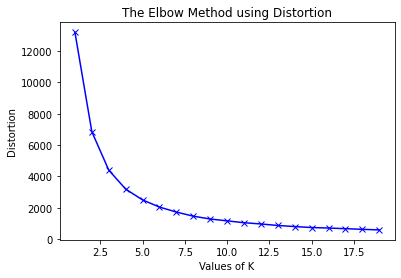

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

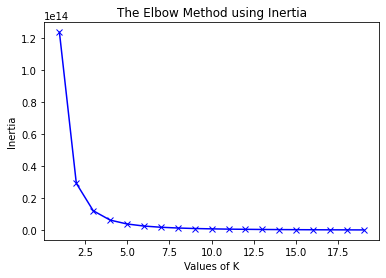

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=3).fit(stores)
clusters=kmeanModel.predict(stores)

In [ ]:
#pickle.dump(kmeanModel,open(r'gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Notebooks/Walmart_Store_Kluster.sav','wb'))

##Building Store Dataframe

#Bin0

In [ ]:
df['Store_Bins']=clusters

In [ ]:
bins=df.loc[df['Store_Bins']==0] 

In [ ]:
dates=set(bins['Date'])
dates=sorted(dates)

In [ ]:
d = {'Date':dates, 'Weekly_Sales':np.empty([len(dates)])}
bin0 = pd.DataFrame(data=d)

In [ ]:
sales=[]
for date in dates:
  '''Gather the weekly reportings of a given a week'''
  week=bins.loc[bins['Date']==date]
  i=0
  sale=0
  while(i<len(week)):
    row=week.iloc[i]
    #key 5 retrieves Weekly Sales value
    sale+=row.get(key=5)
    i+=1
  sales.append(sale)

In [ ]:
i=0
for sale in sales:
  bin0.at[i,'Weekly_Sales']=sale
  i+=1

In [ ]:
def minMax(df,col):
  min = df[col].min()
  max = df[col].max()
  return (df[col] - min) / (max - min)

In [ ]:
bin0['Weekly_Sales_log']=bin0['Weekly_Sales'].apply(lambda x:np.log(x))

In [ ]:
bin0["log_minMax"] = minMax(df=bin0,col="Weekly_Sales_log")

In [ ]:
bin0['log_minMax']

0      0.838670
1      0.773612
2      0.855139
3      0.880376
4      0.871977
         ...   
138    0.927942
139    0.813311
140    0.816071
141    0.878203
142    0.814263
Name: log_minMax, Length: 143, dtype: float64

In [ ]:
#bin0.to_csv('gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Data/W_Store_Bin0.csv')

#Bin1

In [ ]:
bins=df.loc[df['Store_Bins']==1] 

In [ ]:
bin1 = pd.DataFrame(data=d)

In [ ]:
sales=[]
for date in dates:
  '''Gather the weekly reportings of a given a week'''
  week=bins.loc[bins['Date']==date]
  i=0
  sale=0
  while(i<len(week)):
    row=week.iloc[i]
    #key 5 retrieves Weekly Sales value
    sale+=row.get(key=5)
    i+=1
  sales.append(sale)

In [ ]:
i=0
for sale in sales:
  bin1.at[i,'Weekly_Sales']=sale
  i+=1

In [ ]:
bin1['Weekly_Sales_log']=bin1['Weekly_Sales'].apply(lambda x:np.log(x))

In [ ]:
bin1["log_minMax"] = minMax(bin1,"Weekly_Sales_log")

In [ ]:
bin1['log_minMax']

0      0.357142
1      0.272825
2      0.294474
3      0.149886
4      0.271201
         ...   
138    0.203389
139    0.314711
140    0.241241
141    0.206275
142    0.237161
Name: log_minMax, Length: 143, dtype: float64

In [ ]:
#bin1.to_csv('gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Data/W_Store_Bin1.csv')

#Bin2

In [ ]:
bins=df.loc[df['Store_Bins']==2] 

In [ ]:
bin2 = pd.DataFrame(data=d)

In [ ]:
sales=[]
for date in dates:
  '''Gather the weekly reportings of a given a week'''
  week=bins.loc[bins['Date']==date]
  i=0
  sale=0
  while(i<len(week)):
    row=week.iloc[i]
    #key 5 retrieves Weekly Sales value
    sale+=row.get(key=5)
    i+=1
  sales.append(sale)

In [ ]:
i=0
for sale in sales:
  bin2.at[i,'Weekly_Sales']=sale
  i+=1

In [ ]:
bin2['Weekly_Sales_log']=bin2['Weekly_Sales'].apply(lambda x:np.log(x))

In [ ]:
bin2["log_minMax"] = minMax(bin2,"Weekly_Sales_log")

In [ ]:
bin2['log_minMax']

0      0.395512
1      0.657567
2      0.577380
3      0.389714
4      0.406890
         ...   
138    0.271910
139    0.422009
140    0.491605
141    0.443585
142    0.499497
Name: log_minMax, Length: 143, dtype: float64

In [ ]:
#bin2.to_csv('gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Data/W_Store_Bin2.csv')